# Learn calculations in Python with ClimoMarineLab 
https://github.com/akashspunnayil/ClimoMarineLab

## Installing necessary packages for this notebook
### uncomment to run the cells, if needed 

In [1]:
# !pip install netCDF4
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install xarray

## Load packages 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

## Load data¶

In [3]:
dataPath = './data/' # change if necessary

Current_Mer = xr.open_dataset(dataPath+'BoB_OSCAR_MeridionalCurrent_Monthly_2016_2019.nc')

Current_Zon = xr.open_dataset(dataPath+'BoB_OSCAR_ZonalCurrent_Monthly_2016_2019.nc')

In [4]:
print('this is Current_Mer', Current_Mer)
print(' ')
print(' ')
print('this is Current_Zon', Current_Zon)

this is Current_Mer <xarray.Dataset>
Dimensions:           (LON161_40141_121: 81, LAT320_46041_141: 101, TIME: 48,
                       bnds: 2)
Coordinates:
  * LON161_40141_121  (LON161_40141_121) float64 80.0 80.25 80.5 ... 99.75 100.0
  * LAT320_46041_141  (LAT320_46041_141) float64 0.0 0.25 0.5 ... 24.75 25.0
  * TIME              (TIME) datetime64[ns] 2016-01-31 2016-02-29 ... 2019-12-31
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds         (TIME, bnds) datetime64[ns] ...
    V                 (TIME, LAT320_46041_141, LON161_40141_121) float32 ...
Attributes:
    history:      PyFerret V7.63 (optimized) 10-Nov-23
    Conventions:  CF-1.6
 
 
this is Current_Zon <xarray.Dataset>
Dimensions:           (LON161_40141_121: 81, LAT320_46041_141: 101, TIME: 48,
                       bnds: 2)
Coordinates:
  * LON161_40141_121  (LON161_40141_121) float64 80.0 80.25 80.5 ... 99.75 100.0
  * LAT320_46041_141  (LAT320_46041_141) float64 0.0 0.25 0.5 ... 24.75 25.0
  *

# Current speed,               $C_{\text{mag}} = \sqrt{u^2 + v^2}$


In [5]:
# Calculate current speed
current_speed = np.sqrt(Current_Mer['V']**2 + Current_Zon['U']**2)
print(current_speed.shape)
print(current_speed.dims)

(48, 101, 81)
('TIME', 'LAT320_46041_141', 'LON161_40141_121')


# A quick plot

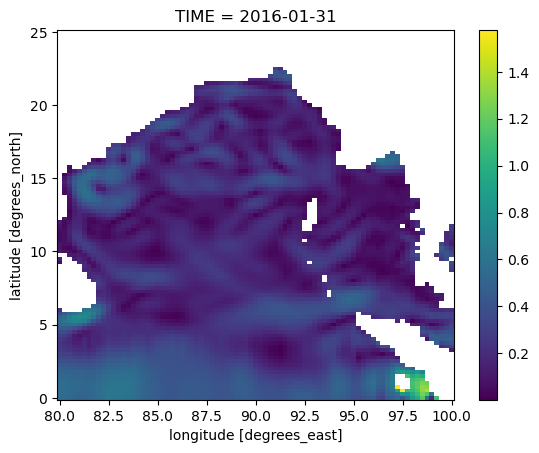

In [6]:
current_speed[0,:,:].plot()

# Plotting the current speed and overlay the vectors

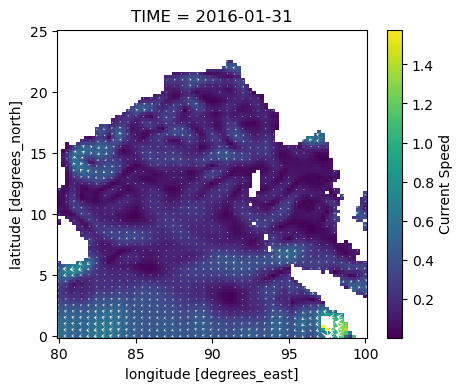

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# Plot current speed for first time step of data (TIME=0)
cur = current_speed.isel(TIME=0).plot()

# Set the threshold for plotting arrows
speed_threshold = 0.1

# Mask u and v based on the threshold
u_masked = np.where(current_speed > speed_threshold, Current_Zon['U'][0, :, :].values, np.nan)
v_masked = np.where(current_speed > speed_threshold, Current_Mer['V'][0, :, :].values, np.nan)

# Subsample the data by selecting every nth point
subsample_factor = 2
lon_subset = Current_Mer['LON161_40141_121'].values[::subsample_factor]
lat_subset = Current_Mer['LAT320_46041_141'].values[::subsample_factor]
u_subset = u_masked[0, ::subsample_factor, ::subsample_factor]
v_subset = v_masked[0, ::subsample_factor, ::subsample_factor]

# Overlay u and v vectors as arrows
quiver = plt.quiver(
    lon_subset,
    lat_subset,
    u_subset,
    v_subset,
    color='white', scale=50, width=0.003, headwidth=15, headlength=10
) # scale=50, width=0.001, headwidth=6, headlength=10

# Set label for the colorbar
cur.colorbar.set_label('Current Speed')


fig.savefig('current_speed.png', bbox_inches='tight',  dpi=300)
plt.show()


# END OF CODE

Feel free to reach out to the author if you have any questions or need any scientific assistance: Akash (akashspunnayil@gmail.com)